# Generating PCA's for a given learning probability

## Setting up packages

In [1]:
using Pkg
Pkg.activate(".")
Pkg.add("Plots")
Pkg.add("Random")

  Activating project at `c:\School\BS Thesis\src`


    Updating registry at `C:\Users\ioakimsy\.julia\registries\General.toml`


   Resolving package versions...


  No Changes to `C:\School\BS Thesis\src\Project.toml`
  No Changes to `C:\School\BS Thesis\src\Manifest.toml`

   Resolving package versions...

  No Changes to `C:\School\BS Thesis\src\Project.toml`


  No Changes to `C:\School\BS Thesis\src\Manifest.toml`

In [2]:
using Plots
using Random

## Generating the next generation given the previous generation

In [3]:
function generate_next_generation(prev_generation,array_size,λ)
    #Set up array for next generation
    next_generation = zeros(Int64,1,array_size)

    #For each cell in the generation, define its neighborhood
    Threads.@threads for i in range(2,array_size-1)
        neighborhood = prev_generation[i-1:i+1]

        #Retain learned state if cell is already learned
        if neighborhood[2]==1
            next_generation[i] = 1

        #If not learned, check probability for learning, generate random number to compare
        else
            learning_probability = 1-((1-λ)^(sum(neighborhood)))

            if rand() <= learning_probability #Learn succeed
                next_generation[i]=1
                
            else
                next_generation[i]=0
            end
        end

    end
    return next_generation
end


generate_next_generation (generic function with 1 method)

## Generating the whole grid given initial conditions and the learning probability

In [4]:
function generate_plot(grid,λ)
    max_generations, array_size = size(grid)

    current_generation_number = 1
    while current_generation_number < max_generations-1
        current_generation = grid[current_generation_number,:]
        next_generation = generate_next_generation(current_generation,array_size,λ)
        grid[current_generation_number+1,:] = next_generation #error here, check if next generation is being produced correctly  
        current_generation_number = current_generation_number + 1
    end

    return grid, current_generation_number

end

generate_plot (generic function with 1 method)

## Generating the plot from parameters: array size, maximum number of generations, and learning probability

In [5]:
function PCA(array_size,max_generations,λ)
    #Setting up first generation
    PCA_grid = zeros(Int64,max_generations,array_size)

    middle = (array_size+1)/2
    middle = convert(Int,middle)
    first_generation = zeros(Int64, 1, array_size)
    first_generation[middle] = 1

    PCA_grid[1,:] = first_generation

    PCA_grid, number_of_generated_generations = generate_plot(PCA_grid,λ)

    learned_per_generation = sum(PCA_grid,dims=2)

    PCA_grid_heatmap = heatmap(PCA_grid,
    plot_title = "PCA with learning probability $λ and $(number_of_generated_generations+1) \ngenerations of $(array_size) length arrays",
    plot_titlefontsize = 24,
    yflip=true,
    aspect_ratio=:equal,
    xlims=(0.5,array_size+0.5),
    showaxis = false, #Removes the axes' black lines
    axis=([], false), #Removes the numbrs on the axis
    ylims=(0.5,number_of_generated_generations+0.5),
    #ylabel = "Number of Generations",
    dpi=150,
    size=((array_size+50)*5,(number_of_generated_generations+75)*5),
    cbar=false,
    c = palette(:grays,rev=true)
    )

    learned_per_generation_plot = plot(learned_per_generation,
    label = "Learning probability λ = $λ",
    xlims=(0.5,array_size-1.5),
    xlabel = "Generation number",
    ylims=(0.5,number_of_generated_generations+0.5),
    ylabel = "Number of learned cells",
    )

    return PCA_grid_heatmap,learned_per_generation_plot
            

end

PCA (generic function with 1 method)

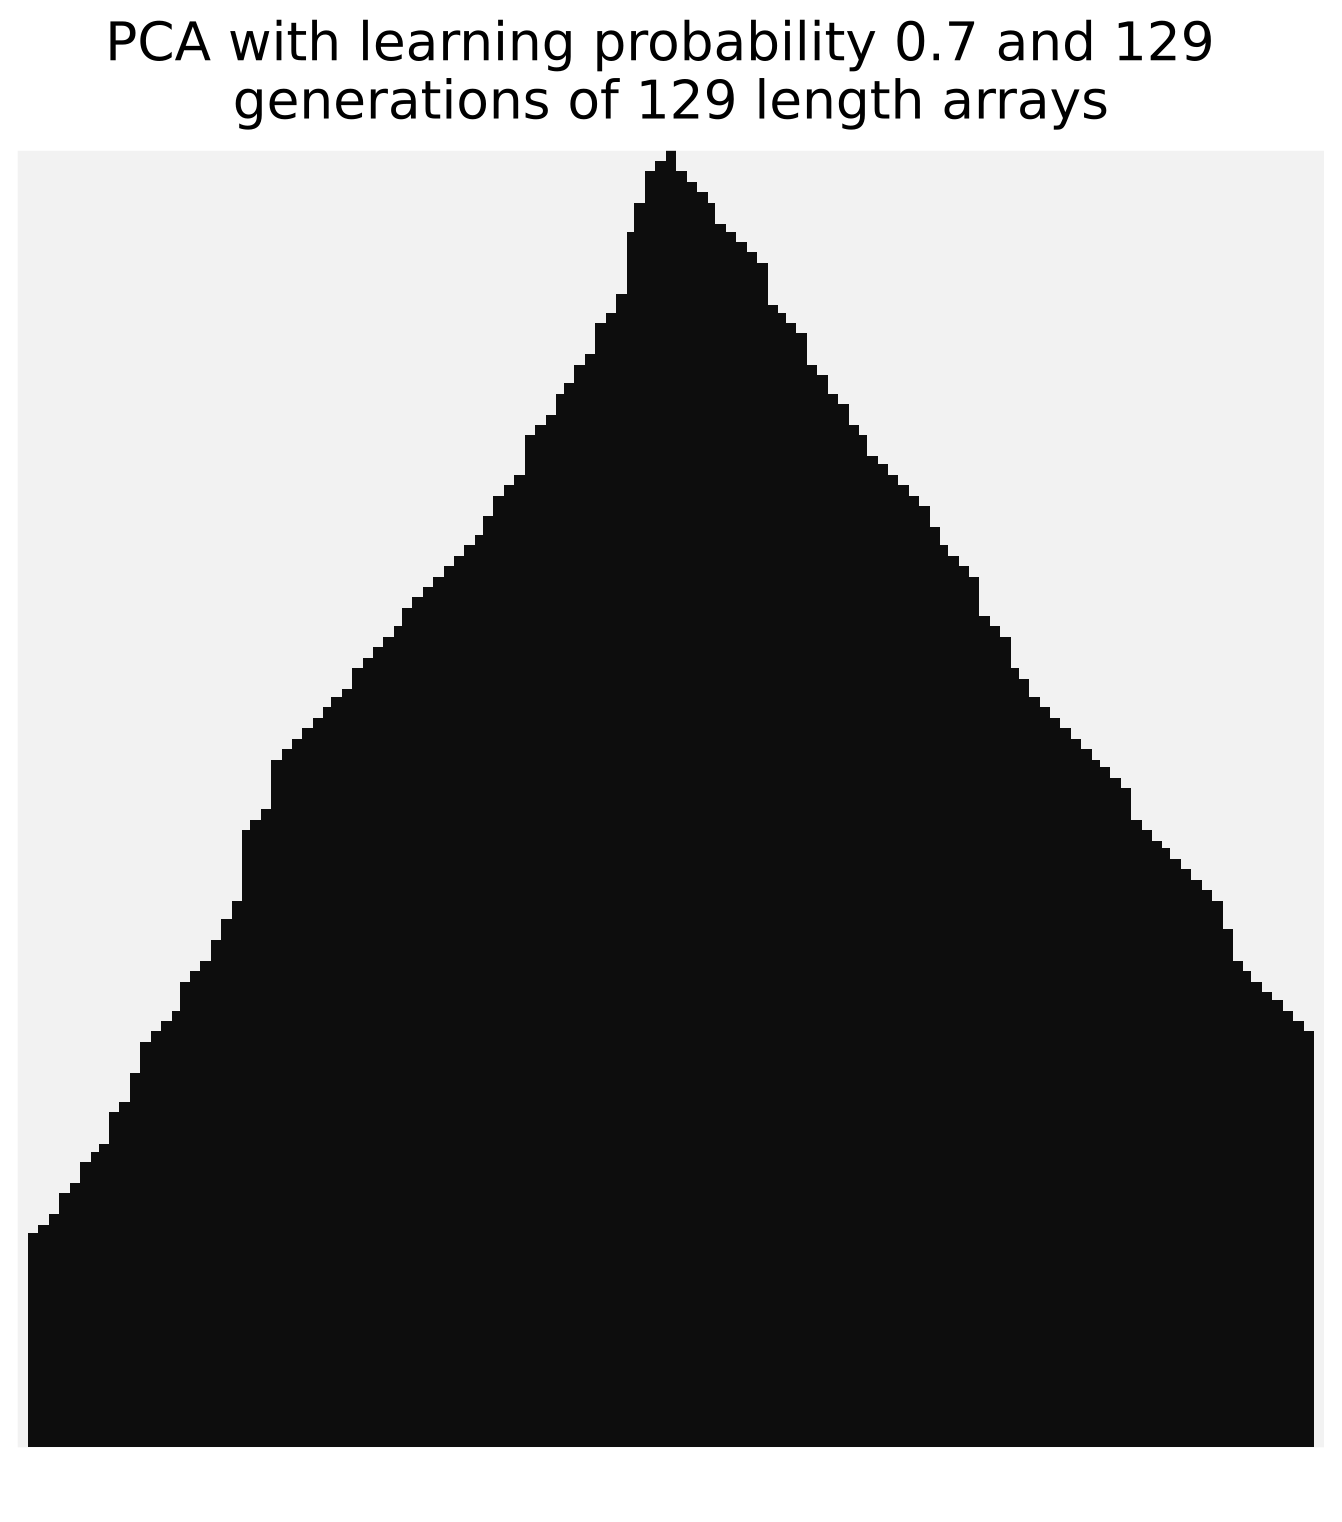

In [34]:
λ = 0.7
array_size = 129
max_generations = 129

graphs = PCA(array_size, max_generations, λ)
plot(graphs[1])

# Observations:
- saturation point because of finite size effect
- slope at 2λ because 2 seatmates in 1D

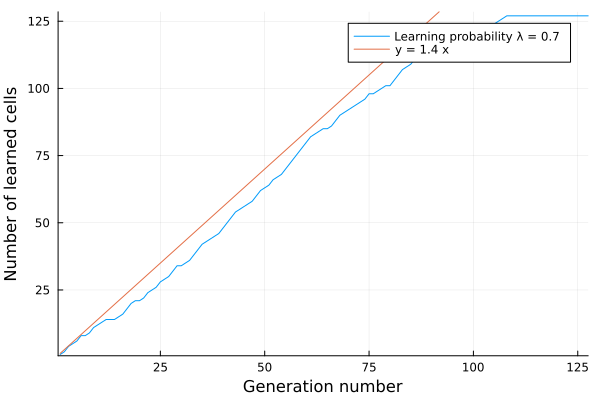

In [35]:
plot(graphs[2])
x = LinRange(1,129,1000)
m = 2*λ
y = m*x
plot!(x,y, label="y = $(m) x")

## Saving output figures

In [44]:
for trial_number in range(1,3)
    for λ in 0.3:0.3:0.9
        λ = round(λ,digits=2)

        array_size = 129
        max_generations = 129

        graphs = PCA(array_size, max_generations, λ)
        savefig(plot(graphs[1], dpi=300),"C:/School/BS Thesis/output/PCA-129x129/lambda_$(λ)/PCA_trial_$(trial_number).png")

        plot(graphs[2], dpi=300)
        x = LinRange(1,129,1000)
        m = 2*λ
        y = m*x
        
        savefig(plot!(x,y, label="y = $(m) x"),"C:/School/BS Thesis/output/PCA-129x129/lambda_$(λ)/Cell_per_generation_trial_$(trial_number).png")
        
        #println("Done with $(trial_number)")
    end
end